In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [127]:
df.dropna(inplace = True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = df.drop('median_house_value',axis = 1)
y = df['median_house_value']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

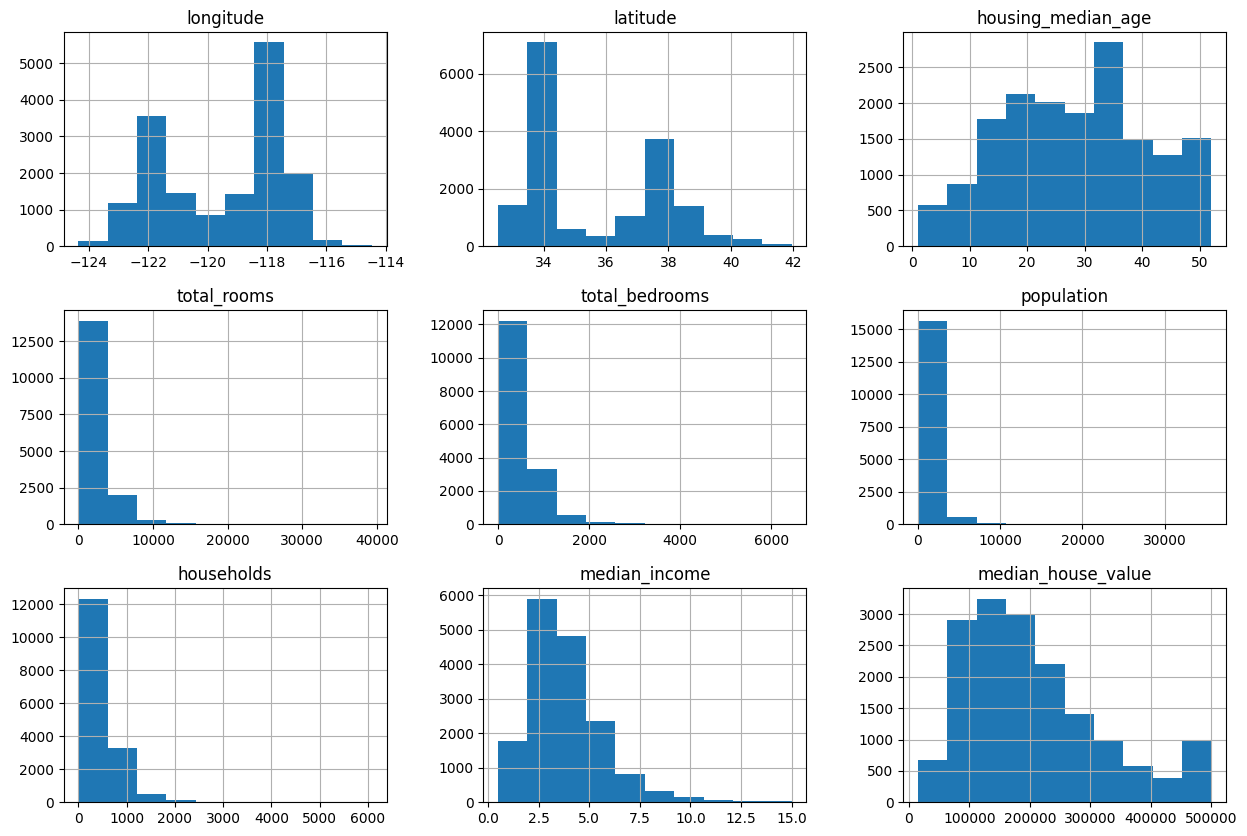

In [133]:
train_data.hist(figsize=(15,10))

In [134]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

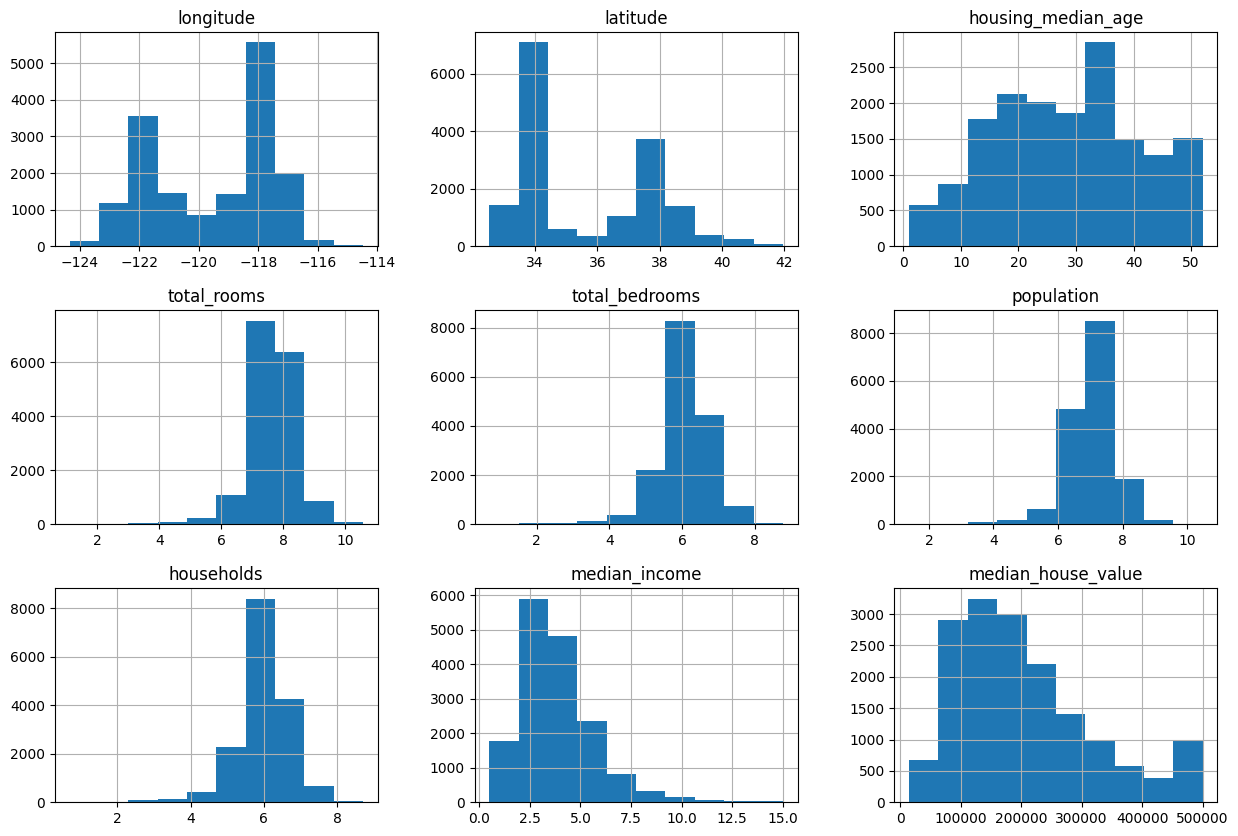

In [135]:
train_data.hist(figsize=(15,10))

In [136]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7218
INLAND,5204
NEAR OCEAN,2108
NEAR BAY,1813
ISLAND,3


In [137]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis = 1)

In [138]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15994,-122.47,37.76,48.0,7.809947,6.131226,7.073270,6.129050,4.4946,358600.0,False,False,False,True,False
8744,-118.32,33.81,27.0,7.656337,5.942799,7.012115,5.888878,4.7062,357000.0,True,False,False,False,False
4739,-118.38,34.05,40.0,7.763446,6.395262,7.033506,6.335054,3.2380,287500.0,True,False,False,False,False
14003,-116.90,34.52,20.0,8.155362,6.734592,7.435438,6.376727,1.4000,77700.0,False,True,False,False,False
4425,-118.24,34.07,27.0,5.411646,4.394449,5.521461,4.418841,1.6136,137500.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,-118.44,33.81,33.0,8.292799,6.898715,7.407318,6.837333,5.0106,500001.0,False,False,False,False,True
203,-122.23,37.78,52.0,6.894670,5.556828,6.916715,5.545177,1.4844,119400.0,False,False,False,True,False
15078,-116.97,32.83,23.0,5.010635,3.496508,4.624973,3.555348,2.6458,112500.0,True,False,False,False,False
17693,-121.81,37.28,17.0,7.731053,6.061457,7.543273,6.047372,5.7078,217000.0,True,False,False,False,False


<Axes: >

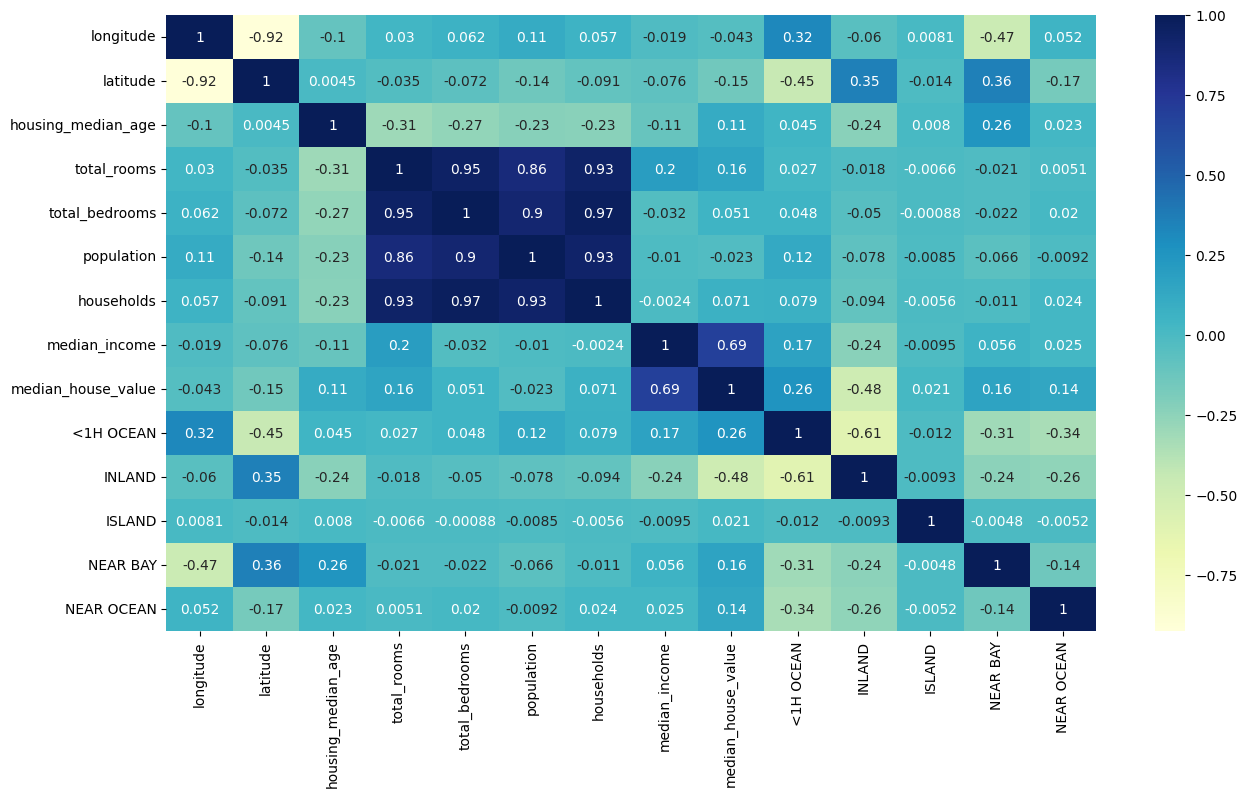

In [139]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

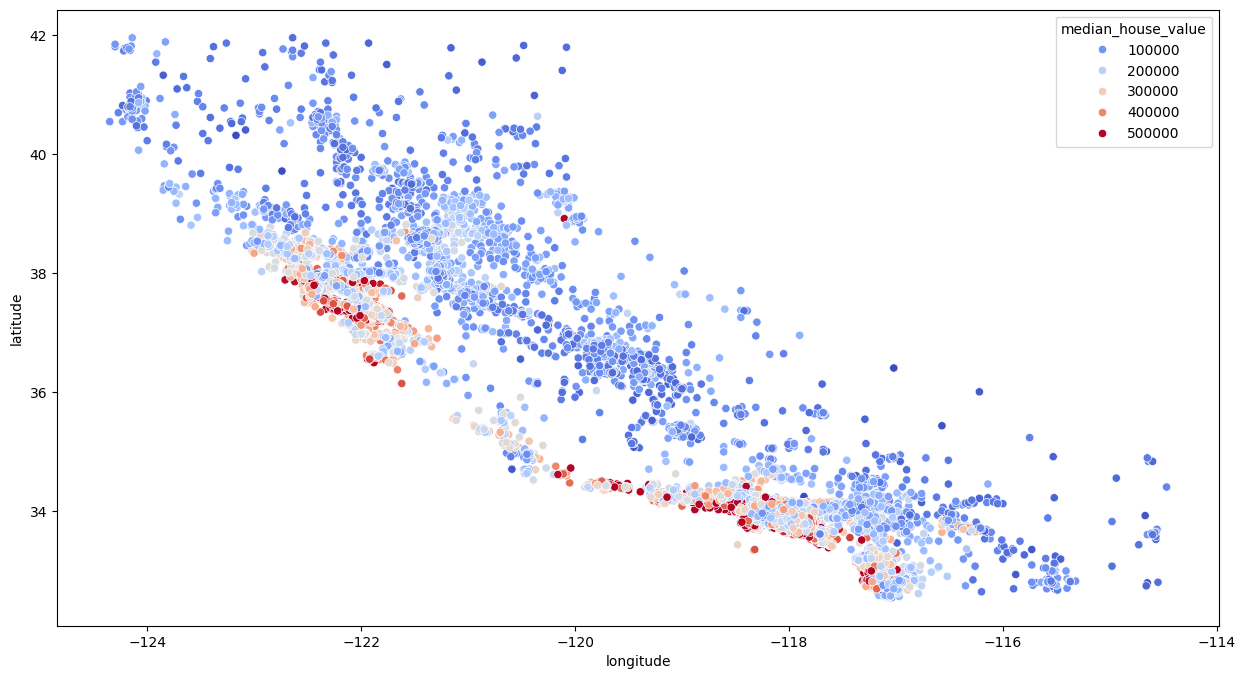

In [140]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=train_data , palette='coolwarm')

Feature Engineering

In [141]:
train_data['rooms_per_household'] = train_data['total_rooms']/train_data['households']
train_data['bedrooms_per_room'] = train_data['total_bedrooms']/train_data['total_rooms']

<Axes: >

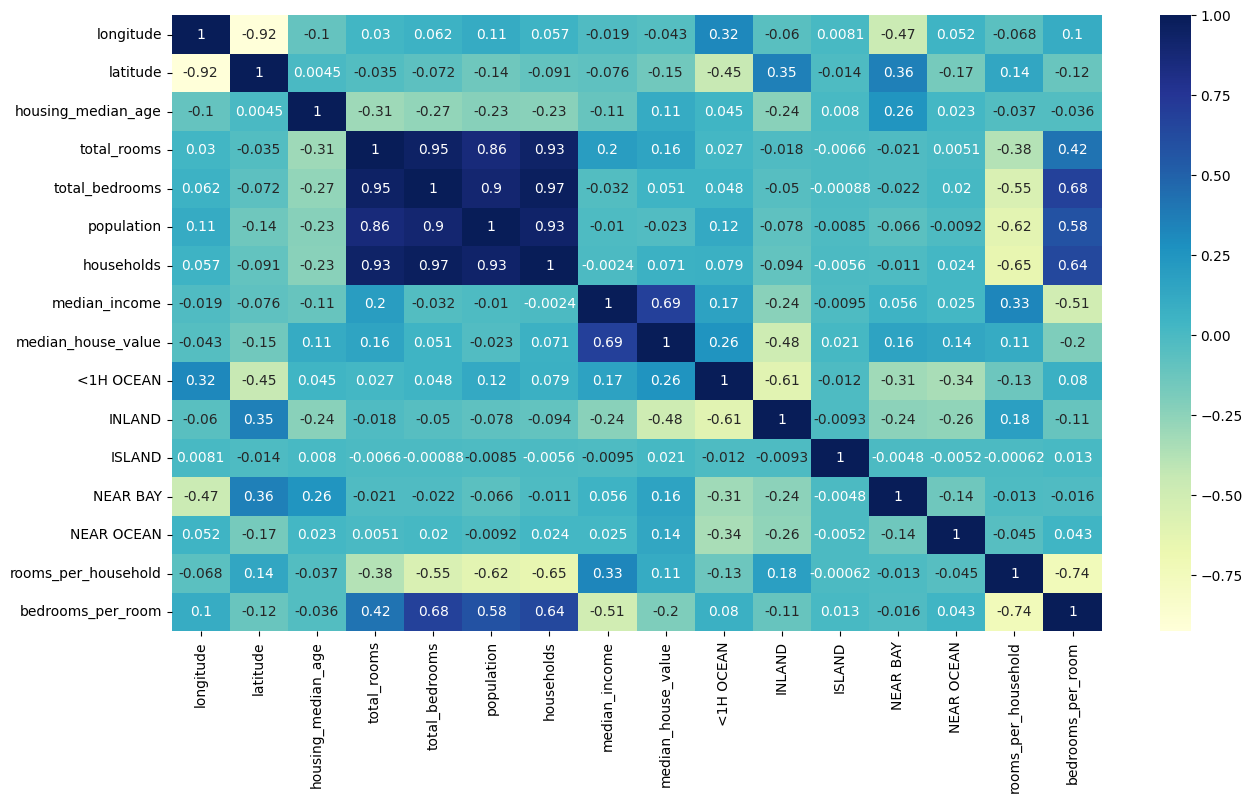

In [142]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [143]:
from sklearn.linear_model import LinearRegression
X_train = train_data.drop('median_house_value',axis = 1)
y_train = train_data['median_house_value']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [144]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity',axis = 1)
test_data['rooms_per_household'] = test_data['total_rooms']/test_data['households']
test_data['bedrooms_per_room'] = test_data['total_bedrooms']/test_data['total_rooms']

In [145]:
X_test = test_data.drop('median_house_value',axis = 1)
y_test = test_data['median_house_value']

In [146]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room
12236,-116.95,33.74,18.0,7.599401,6.006353,7.147559,5.993961,2.7083,91200.0,False,True,False,False,False,1.267843,0.790372
9491,-123.19,39.21,22.0,7.341484,5.676754,6.711740,5.655992,3.5917,118800.0,True,False,False,False,False,1.298001,0.773243
19310,-122.85,38.37,16.0,7.474772,5.683580,6.698268,5.697093,4.4437,305000.0,True,False,False,False,False,1.312033,0.760368
19446,-121.03,37.69,5.0,8.302762,6.648985,7.584773,6.610696,3.8065,146000.0,False,True,False,False,False,1.255959,0.800816
17461,-119.88,34.43,14.0,7.813187,6.530878,7.164720,6.432940,3.3026,229500.0,False,False,False,False,True,1.214559,0.835879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11341,-117.93,33.75,15.0,7.803435,6.401917,7.418781,6.356108,3.5967,141600.0,True,False,False,False,False,1.227707,0.820397
3646,-118.45,34.23,25.0,8.387995,7.222566,8.238008,7.145196,2.5833,183700.0,True,False,False,False,False,1.173935,0.861060
6035,-117.72,34.06,32.0,7.700748,6.484635,7.449498,6.345636,1.9643,113200.0,False,True,False,False,False,1.213550,0.842079
11211,-117.91,33.82,32.0,7.899895,6.463029,7.754053,6.440947,2.9479,184600.0,True,False,False,False,False,1.226512,0.818116


In [147]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room
15994,-122.47,37.76,48.0,7.809947,6.131226,7.073270,6.129050,4.4946,358600.0,False,False,False,True,False,1.274251,0.785054
8744,-118.32,33.81,27.0,7.656337,5.942799,7.012115,5.888878,4.7062,357000.0,True,False,False,False,False,1.300135,0.776194
4739,-118.38,34.05,40.0,7.763446,6.395262,7.033506,6.335054,3.2380,287500.0,True,False,False,False,False,1.225474,0.823766
14003,-116.90,34.52,20.0,8.155362,6.734592,7.435438,6.376727,1.4000,77700.0,False,True,False,False,False,1.278926,0.825787
4425,-118.24,34.07,27.0,5.411646,4.394449,5.521461,4.418841,1.6136,137500.0,True,False,False,False,False,1.224676,0.812036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,-118.44,33.81,33.0,8.292799,6.898715,7.407318,6.837333,5.0106,500001.0,False,False,False,False,True,1.212870,0.831892
203,-122.23,37.78,52.0,6.894670,5.556828,6.916715,5.545177,1.4844,119400.0,False,False,False,True,False,1.243363,0.805960
15078,-116.97,32.83,23.0,5.010635,3.496508,4.624973,3.555348,2.6458,112500.0,True,False,False,False,False,1.409323,0.697817
17693,-121.81,37.28,17.0,7.731053,6.061457,7.543273,6.047372,5.7078,217000.0,True,False,False,False,False,1.278415,0.784040


In [149]:
model.score(X_test,y_test)

0.6870978273744313

In [150]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [151]:
forest.score(X_test,y_test)

0.8276036666024631

In [157]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8],
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [158]:
bestForest = grid_search.best_estimator_

In [159]:
bestForest.score(X_test,y_test)

0.8223122337311446